In [203]:
#coding:utf-8

import random

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

import numpy as np
import pylab

from nltk import stem
import re
import random

In [204]:
sentences = []

with open("./rt-polaritydata/pos.txt", "r") as f:
    for line in f:
        sentences.append("+1 " + line)

with open("./rt-polaritydata/neg.txt", "r") as f:
    for line in f:
        sentences.append("-1 " + line)

random.shuffle(sentences)

with open("./sentiment.txt", "w") as f:
    for s in sentences:
        f.write(s)

Stop wordとは
--------------------------------------
<p>自然言語を処理するにあたって一般的であるなどの理由で処理対象外とする単語。</p>

In [205]:
def is_stopword(word):
    return word in count_vectorizer.get_stop_words()

In [206]:
#センテンスを取得
def get_sentence():
    sentences = []

    with open("./rt-polaritydata/pos.txt", "r") as f:
        for line in f:
            sentences.append({'label':1, 'sentence':line})

    with open("./rt-polaritydata/neg.txt", "r") as f:
        for line in f:
            sentences.append({'label':-1, 'sentence':line})

    random.shuffle(sentences)

    return sentences

In [207]:
def create_feature(sentence):
    fuature = []
    words = ""
    stemmer = stem.PorterStemmer()
    sentences = []
    labels = []

    # 素性の作成
    for s in sentence:
        for word in re.compile(r'[,.:;\s]').sub(" ", s['sentence']).split():
            if (not (is_stopword(word))):
                words = words + " " + stemmer.stem(word)
        sentences.append(words)
        labels.append(s['label'])
        words = ""
    fuature.append(sentences)
    fuature.append(labels)
    return fuature

In [208]:
def create_words_weight(vacabulary, coef):
    word_weight = []
    for vocab, weight in zip(vacabulary, coef):
        word_weight.append({'vocab': vocab, 'weight': weight})

    return word_weight

In [225]:
def export_predict(X, Y, lr):
    true_labels = Y
    pre_labels = lr.predict(X)
    prob = lr.predict_proba(X)
    
    line = ""

    with open("./prob.txt", "w") as f:
        for i, t_label in enumerate(true_labels):
            if t_label==1:
                line = str(t_label) + "  " + str(pre_labels[i]) + "  "+ str(prob[i][1]) +"\n"
            elif t_label==-1:
                line = str(t_label) + "  " + str(pre_labels[i]) + "  "+ str(prob[i][0]) +"\n"

            f.writelines(line)

<h3>やりたいこと</h3>
ある文章とその文章のP or Nがあったときに、その(学習に利用した)すべての文章のP or Nをもっともうまく判別できるロジスティック回帰モデルを作成したい
→ロジスティック回帰モデルのパラメータθを決定したい

<div class="images">
<img alt="" src="sigmoid.png" align="left" width="400" height="300">
</div>

<h4>特徴</h4>
    * yの値が0〜1の間におさまる
    * 導関数をシグモイド関数自身で簡単に導出できる

$$文章　f(x)= θ_0 + θ_1x_1 + θ_2x_2  ・・・$$
$$σ(f_θ(x))　　→　　文章がポジティブ(or ネガティブ)である確率を算出$$
$$P(C=t | x) = σ(f_θ(x))　^t (1-σ(f_θ(x))^{1-t} $$
$$L(θ) = \prod P(C=t | x)　←　こいつを最大化するθを算出する$$ 

$$Cost(θ) = -\sum{(t_i)σ(f_θ(x))　^t + (1-t)(1-σ(f_θ(x))^{1-t} }$$

上記の式から勾配法を用いてCost(w)が最小となるθを求める

In [210]:
if __name__ == "__main__":
    count_vectorizer = CountVectorizer(stop_words='english')

    sentence = get_sentence()
    fuature = create_feature(sentence)

    print("fuature:  ",fuature[0][0:20])
    print(fuature[1][0:20])

fuature:   [' " god i\'m behav like idiot ! " ye ben kingsley', ' undeni intrigu film adventur young talent find inspir fring american underground', ' all-french cast marveilleux', ' intrigu stylish', ' writer/director burr steer emphas q quirki mix result', ' just move uplift funni', " play like high-end john hugh comedi kind elder bueller' time", ' crush worst film man women valley doll', ' hugh grant good line charm charm boy', ' partli schmaltzi by-the-numb romant comedi partli shallow rumin empti success -- entir soulless', ' spiffi anim featur unruli adolesc boy yearn adventur chanc prove worth', ' caruso descend sub-tarantino cute make sure salton sea work way good noir keep tight nasti', ' tv episod inflat past natur length', " i'm sorri say seal deal - arnold", ' play ryan gosl danni frighteningli fascin contradict', ' frenet realli funni', " ' despit lag near finish line movi run good race edg seat long stretch '", ' piccoli give superb perform deep feel', ' leap stori line s

In [211]:
    #単語数のカウント
    feature_vectors = count_vectorizer.fit_transform(fuature[0])
    vocabulary = count_vectorizer.get_feature_names()

    X = feature_vectors.toarray()
    Y = fuature[1]

    Y = [y if y == 1 else 0 for y in Y]
    print("vocabulary",vocabulary[1000:1050])

vocabulary ['barrel', 'barrett', 'barri', 'barrie', 'barrier', 'barris', 'barrow', 'barry', 'barrymor', 'bart', 'bartlebi', 'bartleby', 'bartlett', 'bas', 'base', 'basebal', 'baseball', 'based', 'basest', 'bash', 'basi', 'basic', 'bask', 'basketbal', 'bass', 'bast', 'bastard', 'bastion', 'bat', 'batch', 'bate', 'bath', 'batho', 'bathroom', 'bathtub', 'batman', 'batter', 'batteri', 'battista', 'battl', 'battlefield', 'bawdi', 'baz', 'bazadona', 'beach', 'beachcomb', 'beacon', 'bead', 'beam', 'bean']


In [212]:
    print(X)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [213]:
    print(Y[0:100])

[0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]


In [215]:
    #学習
    lr = LogisticRegression(C=1000.0)
    lr.fit(X, Y)

    print(lr.get_params)

<bound method BaseEstimator.get_params of LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)>


In [216]:
    #文章を与えて確率を予測
    prob = lr.predict_proba(X[0].reshape(1, -1))[0]
    print(prob)

[  9.99952008e-01   4.79917781e-05]


In [217]:
    #単語と重みの紐付け
    word_weight = create_words_weight(vocabulary, lr.coef_[0])

    #TOP10を抽出する
    descend_weight = sorted(word_weight, key=lambda x: x["weight"],reverse=True)
    print("top10", descend_weight[0:11])

top10 [{'vocab': 'badg', 'weight': 20.322222256695376}, {'vocab': 'anatom', 'weight': 19.148294773086075}, {'vocab': 'unsurpass', 'weight': 18.787451114984886}, {'vocab': 'tape', 'weight': 17.784152560036269}, {'vocab': 'taut', 'weight': 17.731070299432655}, {'vocab': 'cloud', 'weight': 17.533222804220799}, {'vocab': 'liber', 'weight': 17.275214231121367}, {'vocab': 'cozi', 'weight': 17.167535213124246}, {'vocab': 'smarter', 'weight': 15.669223378355353}, {'vocab': 'eerili', 'weight': 15.647176089747893}, {'vocab': 'engross', 'weight': 15.510489274008107}]


In [218]:
    #UNDER10を抽出
    ascend_weight = sorted(word_weight, key=lambda x: x["weight"])
    print("under10", ascend_weight[0:11])

under10 [{'vocab': '85', 'weight': -19.555849918959222}, {'vocab': 'poorli', 'weight': -18.860026796894346}, {'vocab': 'unless', 'weight': -18.127958302923219}, {'vocab': 'picture', 'weight': -17.586329310712596}, {'vocab': 'rosenth', 'weight': -17.284226443453413}, {'vocab': 'devolv', 'weight': -17.207120713655179}, {'vocab': 'languor', 'weight': -16.767272835255927}, {'vocab': 'jumbl', 'weight': -16.676451233235944}, {'vocab': 'witherspoon', 'weight': -16.621007581590241}, {'vocab': 'scooter', 'weight': -16.413445796116697}, {'vocab': 'relic', 'weight': -16.317037059423054}]


In [226]:
y_pre = lr.predict(X)
    
#ラベルと確率をファイル出力
export_predict(X, Y, lr)

In [228]:
    '''
    予測の正解率，正例に関する適合率，再現率，F1スコア
    精度(適合率, precision)：正と予測したデータのうち，実際に正であるものの割合
    再現率 (recall)：実際に正であるもののうち，正であると予測されたものの割
    F値 (F尺度, F-measure)：精度と再現率の調和平均．
    '''
    #正解率
    print('accuracy: ' + str(accuracy_score(Y, y_pre)))
    print(classification_report(Y, y_pre))

accuracy: 0.999249671731
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5331
          1       1.00      1.00      1.00      5331

avg / total       1.00      1.00      1.00     10662



<h2>5分割交差検定</h2>
 データを5分割して4つを訓練データ、1つをテストデータとして用いる手法
<h3>accuracy</h3>
正解率
<h3>precision</h3>
正と予測したデータのうち，実際に正であるものの割合
<h3>recall</h3>
実際に正であるもののうち，正であると予測されたものの割合
<h3>f1</h3>
精度と再現率の調和平均

In [229]:
    scores = cross_validation.cross_val_score(lr, X, Y, cv=5, scoring='accuracy')
    print("accuracy:  ", scores)
    scores = cross_validation.cross_val_score(lr, X, Y, cv=5, scoring='precision')
    print("precision:  ", scores)
    scores = cross_validation.cross_val_score(lr, X, Y, cv=5, scoring='recall')
    print("recall:  ", scores)
    scores = cross_validation.cross_val_score(lr, X, Y, cv=5, scoring='f1_weighted')
    print("f1_weighted:  ", scores)

accuracy:   [ 0.69540769  0.69606004  0.70075047  0.70684803  0.70731707]
precision:   [ 0.69252078  0.69351852  0.70075047  0.69565217  0.70275229]
recall:   [ 0.70290534  0.70262664  0.70075047  0.73545966  0.71857411]
f1_weighted:   [ 0.69539056  0.69604693  0.70075047  0.70660785  0.70727998]


In [232]:
thresholds = [{1:0.99, 0:0.01},{1:0.95, 0:0.05},{1:0.9, 0:0.1},{1:0.85, 0:0.15},{1:0.8, 0:0.2}
        ,{1:0.75, 0:0.25},{1:0.7, 0:0.3},{1:0.65, 0:0.35},{1:0.6, 0:0.4},{1:0.55, 0:0.45},{1:0.5, 0:0.5}
        ,{1:0.45, 0:0.55},{1:0.4, 0:0.6}, {1:0.35, 0:0.7}, {1:0.3, 0:0.7}, {1:0.25, 0:0.8},{1:0.2, 0:0.8}
        , {1:0.15, 0:0.85},{1:0.1, 0:0.9}, {1:0.05, 0:0.95}, {1:0.01, 0: 0.99}]

precision_rates = []
recall_rates = []

for threshold in thresholds:
    lr = LogisticRegression(C=1000.0, class_weight=threshold)
    lr.fit(X, Y)
    
    scores = cross_validation.cross_val_score(lr, X, Y, cv=5, scoring='precision')
    precision_rates.append(scores[0])
    print('precision', scores[0])
    scores = cross_validation.cross_val_score(lr, X, Y, cv=5, scoring='recall')
    recall_rates.append(scores[0])
    print('recall', scores[0])
    print("===========================")

precision 0.637323943662
recall 0.848172446111
precision 0.662992125984
recall 0.789128397376
precision 0.67443796836
recall 0.759137769447
precision 0.680614859095
recall 0.746954076851
precision 0.679653679654
recall 0.735707591378
precision 0.68031358885
recall 0.731958762887
precision 0.682019486271
recall 0.721649484536
precision 0.684870188004
recall 0.716963448922
precision 0.688628158845
recall 0.715089034677
precision 0.693150684932
recall 0.711340206186
precision 0.692449355433
recall 0.704779756326
precision 0.695167286245
recall 0.701030927835
precision 0.695246971109
recall 0.69915651359
precision 0.700378071834
recall 0.694470477976
precision 0.701435406699
recall 0.686972820993
precision 0.70502901354
recall 0.683223992502
precision 0.712881022616
recall 0.679475164011
precision 0.716566866267
recall 0.672914714152
precision 0.72510373444
recall 0.655107778819
precision 0.740088105727
recall 0.629803186504
precision 0.775204359673
recall 0.533270852858


[0.63732394366197187, 0.66299212598425195, 0.67443796835970027, 0.6806148590947908, 0.67965367965367962, 0.68031358885017423, 0.68201948627103637, 0.68487018800358102, 0.68862815884476536, 0.69315068493150689, 0.69244935543278086, 0.69516728624535318, 0.6952469711090401, 0.70037807183364842, 0.70143540669856463, 0.70502901353965186, 0.71288102261553588, 0.71656686626746502, 0.725103734439834, 0.74008810572687223, 0.77520435967302448]
[0.84817244611059039, 0.78912839737582008, 0.75913776944704781, 0.74695407685098403, 0.73570759137769448, 0.73195876288659789, 0.72164948453608246, 0.71696344892221175, 0.71508903467666352, 0.71134020618556704, 0.70477975632614809, 0.7010309278350515, 0.69915651358950326, 0.69447047797563266, 0.68697282099343959, 0.683223992502343, 0.67947516401124652, 0.67291471415182758, 0.65510777881911908, 0.6298031865042174, 0.53327085285848175]


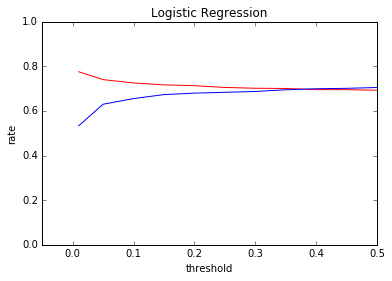

In [234]:
t = [0.99,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0.01]

print(precision_rates)
print(recall_rates)

plt.plot(t, precision_rates, label="precision", color="red")
plt.plot(t, recall_rates, label="recall", color="blue")

plt.xlabel("threshold")
plt.ylabel("rate")
plt.xlim(-0.05, 0.5)
plt.ylim(0, 1)
plt.title("Logistic Regression")
plt.show()